In [1]:
import os
import tensorflow as tf
import numpy as np 
# 下面兩個是用來輔助圖形化
from IPython.display import display
from tfdot import tfdot

***
### 目標一
  - 常數
  - 畫設計圖
  - 執行

In [2]:
#在tensor flow空間內建立一個常數變數
tf.constant(1234)

<tf.Tensor 'Const:0' shape=() dtype=int32>

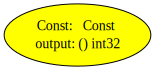

In [3]:
tfdot()

In [4]:
tf.constant(1234.)

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

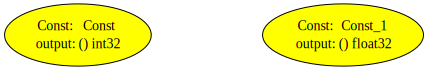

In [5]:
tfdot()

In [6]:
tf.constant([1,2,3,4,5.],name='listA')

<tf.Tensor 'listA:0' shape=(5,) dtype=float32>

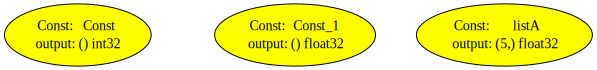

In [7]:
tfdot()

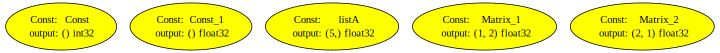

In [8]:
matrix1 = tf.constant([[100., 80.]],name='Matrix_1')
matrix2 = tf.constant([[2.],[2.]], name='Matrix_2')
tfdot()

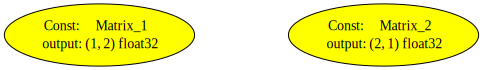

In [9]:
tf.reset_default_graph()
matrix1 = tf.constant([[100., 80.]],name='Matrix_1')
matrix2 = tf.constant([[2.],[2.]], name='Matrix_2')
tfdot()

### tensor 矩陣乘法,
目前的操作都是畫藍圖, 因為要讓多個cpu gpu並行處理, 所以需要先畫藍圖  
圖只是描述邏輯, 並沒有真正的執行  

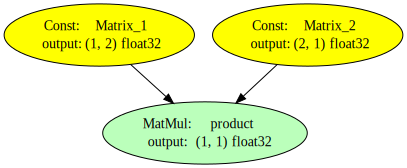

In [10]:
product = tf.matmul(matrix1,matrix2,name='product')
tfdot()

In [11]:
product

<tf.Tensor 'product:0' shape=(1, 1) dtype=float32>

### 執行 
session (操作階段)(在某個機器上定義一個執行的地方 cpu or gpu)
把圖丟給session執行

1. 建立session

In [12]:
sess=tf.Session()

In [13]:
sess.run(product)

array([[ 360.]], dtype=float32)

### 試試看：計算從1累加到10
  - 看懂設計圖
  - 執行確認結果正確

***
### 目標二 建立Place Holder, 然後丟資料進去

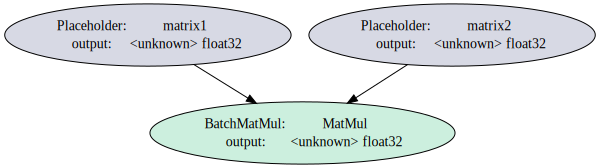

In [14]:
tf.reset_default_graph()
matrix1 = tf.placeholder(tf.float32, name='matrix1')
matrix2 = tf.placeholder(tf.float32, name='matrix2')
#output = matrix1 * matrix2
output = tf.matmul(matrix1,matrix2)
tfdot()

In [15]:
sess=tf.Session()
sess.run(output, feed_dict={matrix1:[[1, 2.,3.]], matrix2:[[1.],[2.],[3.]]})
#output.eval({matrix1:1, matrix2:2})
#feed_dict

array([[ 14.]], dtype=float32)

***
### 目標三：在session內建立Variable
  - 變數的值可以更改 因為數據的傳輸很貴, Variable可以在tensorflow的空間設一個變數, 避免數據來回傳輸
  - 需要一個預設值, 並做出初始化
  - 在做machine learning的時候, 程式會自動調整Variable的值

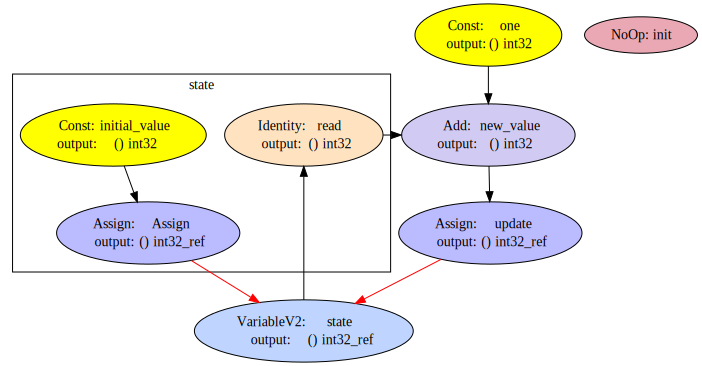

In [16]:
tf.reset_default_graph()
#state = state + 1
state = tf.Variable(0, name='state')
# 新的節點 計數器+1
one = tf.constant(1, name='one')
new_value =  tf.add(state, one, name='new_value')
# 更新 state
update = tf.assign(state, new_value, name='update')

# 變數初始化，這也是一個節點
init_op = tf.global_variables_initializer()
tfdot()

In [17]:
sess=tf.Session()
sess.run(init_op)


In [18]:
sess.run(update)

1

In [19]:
sess.run(state)

1